In [16]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

from eofs.xarray import Eof

import matplotlib.path as mpath
import matplotlib.pyplot as plt

# parameters for setting circular cutoff for Southern Ocean plots
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

In [75]:
fpath = {'CM4':  '/archive/Katherine.Turner/xanadu_mom6_20220703/CM4_piControl_C_restartyear148/gfdl.ncrc5-intel22-prod-openmp/pp/atmos/ts/monthly/5yr',
         'ESM4': '/archive/Katherine.Turner/fre/FMS2021.02_mom6_ESM4_v1.0.3/ESM4_piControl_D/gfdl.ncrc5-intel23-prod-openmp/pp/atmos/ts/monthly/5yr'}

mod = 'ESM4'
ds = xr.open_mfdataset(f'{fpath[mod]}/atmos*slp.nc', use_cftime=True)

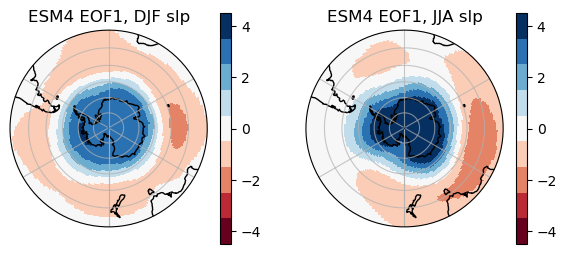

In [76]:
fig, axs = plt.subplots(nrows=1, ncols=2,
                        figsize=(7,3),
                        subplot_kw={'projection': ccrs.SouthPolarStereo()})

s = ['DJF', 'JJA']

for i in range(2):
    slp = ds.slp.sel(lat=slice(-90,-20)).resample(time='QS-DEC').mean()[i*2::4,:,:]

    slp_anom = slp - slp.mean(dim='time')
    slp_anom = slp_anom.compute()

    coslat = np.cos(np.deg2rad(slp_anom.coords['lat'].values)).clip(0., 1.)
    wgts = np.sqrt(coslat)[..., np.newaxis]

    solver = Eof(slp_anom, weights=wgts)
    eof1 = solver.eofsAsCovariance(neofs=1)
    
    if eof1[:,0,0] < 0:
        c = -1
    else:
        c = 1

    (c*eof1).plot(ax=axs[i],
              transform=ccrs.PlateCarree(), 
              cmap=plt.get_cmap('RdBu', 9), 
              vmin=-4.5, vmax=4.5, extend='neither',
              cbar_kwargs={'label':''})

    axs[i].set_title(f'{mod} EOF1, {s[i]} slp')
    
    axs[i].set_extent([-180, 180, -90, -30], ccrs.PlateCarree())
    axs[i].gridlines(alpha=0.7)
    axs[i].set_boundary(circle, transform=axs[i].transAxes)
    axs[i].coastlines()
    
    pcs = solver.pcs(npcs=1, pcscaling=1)
    pcs.to_netcdf(f'/work/Katherine.Turner/smaller_projects/hifreq-variability/data/{mod}_{s[i]}_pc1.nc')
    
plt.savefig(f'/work/Katherine.Turner/smaller_projects/hifreq-variability/figures/{mod}_slp_EOFs.png', format='png', dpi=100)

In [50]:
pcs = solver.pcs(pcscaling=1)

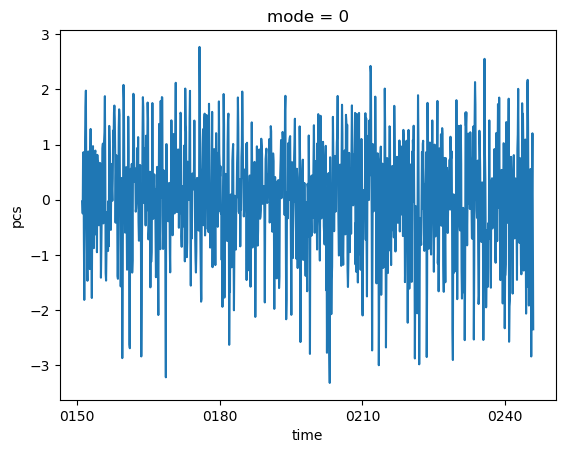

In [51]:
pcs[:,0].plot()

In [43]:
pcs[:,0]

<xarray.DataArray 'pcs' (time: 96)>
array([-0.8568791 ,  0.39836115,  0.4152492 , -0.49365988,  0.37307912,
        1.0293269 , -0.86983025, -1.5121218 , -0.58485985, -1.1738063 ,
        1.6173464 , -1.7435504 , -0.1264888 , -1.6993493 , -0.10050855,
       -0.79641896,  0.71308047, -0.3383401 , -0.63381964, -0.67167276,
       -1.2338088 , -0.09038506,  0.08863592, -0.6629776 , -0.14136897,
        1.5187315 , -1.390394  , -0.14784138, -0.5342119 , -1.9660653 ,
       -0.07798521,  1.9342031 ,  0.4001134 , -0.7921819 , -1.0566586 ,
        0.16167797, -0.6160594 , -0.6575622 , -1.1374371 , -1.3398376 ,
       -0.9025457 ,  0.21078448, -1.658368  ,  1.0623707 ,  0.68450594,
       -0.01998904,  1.1178194 ,  0.59616405,  0.3445247 , -1.0958107 ,
       -0.37274882, -0.4521945 ,  3.1918545 , -0.84103763,  0.11317438,
       -0.4207513 ,  0.69113314, -1.5444576 ,  0.50321746,  1.4602934 ,
       -0.26288038,  1.0760942 , -0.34735736,  0.5436774 ,  1.0022867 ,
       -0.3629082 , -0.701565  , -1.1581886 , -0.09373827,  0.04855302,
        1.532796  ,  1.6462426 ,  0.18738449, -0.05069572, -0.05618546,
        0.8944253 ,  0.32827762, -0.59572536,  1.8452308 ,  0.08890589,
        1.5329331 , -0.67114323, -0.38322547, -1.1079758 ,  0.04417313,
        1.1788198 ,  0.31212705,  0.15748009,  0.30435783,  1.6426764 ,
        1.2096403 , -0.53644186, -0.46933234,  0.19552736,  0.48412168,
        2.669969  ], dtype=float32)
Coordinates:
  * time     (time) object 0150-12-01 00:00:00 ... 0245-12-01 00:00:00
    mode     int64 0